In [ ]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
!pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=7244fd02ee1b62df5552283459b0155b47d13a36a2a81ea52109d9def0cd9ca8
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy


In [ ]:
import openpyxl
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler


In [ ]:
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# chemical name to cids number

In [ ]:
import pandas as pd
import pubchempy as pcp

# Load the Excel file into a DataFrame using the openpyxl engine
df = pd.read_excel('data0.xlsx', engine='openpyxl')

# Define a function to find CIDs for a given chemical name
def find_cid(chemical_name):
    try:
        # Search PubChem for the chemical name and retrieve the first hit
        result = pcp.get_compounds(chemical_name, 'name')
        print(result[0].cid)
        if result:
            return result[0].cid
        else:
            return None
    except:
        # Return None if the CID cannot be found
        return None

# Loop over the rows in the first column of the DataFrame and find CIDs for each chemical name
cid_list = []
counter = 0
for chemical_name in df.iloc[:, 0]:
    cid = find_cid(chemical_name)
    cid_list.append(cid)
    counter += 1
# Add a new column with the CID values
df['CID'] = cid_list

# Save the updated DataFrame to a new Excel file
df.to_excel('updated_file.xlsx', index=False)


145068
3032552
61526
61526
25352
66242
787
24529
944
5360525
14917
24547
24553
24845
5360523
313
24341


# Add descriptors to my dataset

In [ ]:
import requests
from rdkit import Chem
from pubchempy import Compound
import pandas as pd
import time
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors
from pubchempy import Compound
import time
from mordred import Calculator, descriptors
from mordred.AcidBase import AcidicGroupCount
from mordred.AcidBase import BasicGroupCount
import re
import pubchempy as pcp
# Define a function to get the properties for a given CID
def get_properties(cid):
    # Retrieve the logP value for the given CID using PubChem REST API
    formula=""
    iupac_name=""
    logp=""
    h_bond_donors=""
    h_bond_acceptors=""
    TopologicalCharge=""
    LogS=""
    TopoPSA=""
    atomic_polarizability=""
    bond_polarizability=""
    nAtom=""
    nHeavyAtom=""
    nHetero=""
    RotRatio=""
    nAromAtom=""
    nAromBond=""
    wpsa=""
    tpsa=""
    exact_molwt=""
    rel_neg_sasa=""
    aromaticity_ratio=""
    weight_path_count=""
    num_rings=""
    CHEMICAL_GTOUP_NUMBER=""
    Hydrogen_number=""
                
    total_radicals=""
    R_chiral_No=""
    S_chiral_No=""
    sp_count=""
    sp2_count=""
    sp3_count=""
    carbon_count=""
    single_bond=""
    double_bond=""
    triple_bond=""
    atom_number_with_hydrogen=""
    Number_Valence_Electrons=""
            
    Number_Valence_Electrons=""
    tetrahedral=""
    defined_tetrahedral=""
    undefined_tetrahedral =""
    Zagreb1=""
    WPath=""
    WPol=""
    surface_tension=""
    quale_parachor=""
    acidic_group_count=""
    acidic_group_count=""
    effective_hydrogen_bond_acidity=""
    effective_hydrogen_bond_basicity=""
    polarizability=""    
    res = requests.get(f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/CanonicalSMILES/json')
    res.raise_for_status()
    smiles = res.json()['PropertyTable']['Properties'][0]['CanonicalSMILES']
    mol = Chem.MolFromSmiles(smiles)
    time.sleep(0.3)
    ffective_hydrogen_bond_basicity=""
    try:
        compound = pcp.Compound.from_cid(cid)
        iupac_name = compound.iupac_name

        logp = compound.xlogp #1
        h_bond_donors = compound.h_bond_donor_count #2
        h_bond_acceptors = compound.h_bond_acceptor_count # 3

        time.sleep(0.1) # wait for 1 second before making the next request
            # Retrieve the compound for the given CID using PubChemPy
        compound = pcp.Compound.from_cid(cid)
        # Retrieve the SMILES string for the compound
        smiles = compound.isomeric_smiles
        # Convert the SMILES string to an RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)
        # Calculate the Topological Charge for the molecule
        calc = Calculator(descriptors.TopologicalCharge)
        TopologicalCharge = calc(mol)[0]#4
        # Initialize Mordred calculator with LogS descriptor
        calculator = Calculator(descriptors.LogS)
        # Calculate the PNSA descriptor for the molecule
        LogS = calculator(mol)
        LogS = LogS['FilterItLogS']#5
      # Wait for 1 second before making the next request
        time.sleep(0.1)
    # Initialize Mordred calculator with TopoPSA descriptor
        calculator = Calculator(descriptors.TopoPSA)

        # Calculate the PNSA descriptor for the molecule
        TopoPSA = calculator(mol)
        TopoPSA = TopoPSA['TopoPSA']#6
      # Calculate the polarizability descriptor for the molecule

        calculator = Calculator(descriptors.Polarizability)
        polarizability = calculator(mol)
        atomic_polarizability = polarizability['apol']#7
        bond_polarizability = polarizability['bpol']#8

      # Calculate the AtomCount descriptor for the molecule

        calculator = Calculator(descriptors.AtomCount)
        nitrogen_count = calculator(mol)
        result_dict = {str(descriptor): value for descriptor, value in nitrogen_count.items()}
        nHetero = result_dict['nHetero']#9
        nAtom = result_dict['nAtom']#10
        nHeavyAtom = result_dict['nHeavyAtom']#11

        # Initialize Mordred calculator with RotatableBond descriptor
        calculator = Calculator(descriptors.RotatableBond)

        # Calculate the RotatableBond descriptor for the molecule
        RotatableBond = calculator(mol)
        nRot = RotatableBond['nRot']#12
        RotRatio = RotatableBond['RotRatio']#13
        time.sleep(0.1)
        calculator = Calculator(descriptors.Aromatic)
        # Calculate the ABC Index for the molecule
        abc_index = calculator(mol)
        nAromAtom= abc_index[0]#14
        nAromBond= abc_index[1] #15
              # Define the molecule SMILES and the charge
        charge = 1
        # Calculate the TPSA and exact molecular weight of the molecule
        tpsa = rdMolDescriptors.CalcTPSA(mol)#16
        exact_molwt = rdMolDescriptors.CalcExactMolWt(mol)#17
        # Calculate the WPSA of the molecule
        wpsa = tpsa * (abs(charge) / exact_molwt)#18
              # Calculate the relative negatively charged surface area
        num_hbd = rdMolDescriptors.CalcNumHBD(mol)
        num_hba = rdMolDescriptors.CalcNumHBA(mol)
        rel_neg_sasa = (num_hbd - num_hba) / mol.GetNumHeavyAtoms()#19
      # Calculate the aromaticity index using RDKit
        aromatic_atoms = rdMolDescriptors.CalcNumAromaticRings(mol)
        total_atoms = mol.GetNumAtoms()
        aromaticity_ratio = aromatic_atoms / total_atoms#20
        weight_path_count = rdMolDescriptors.CalcNumAliphaticCarbocycles(mol) + rdMolDescriptors.CalcNumAliphaticHeterocycles(mol) + rdMolDescriptors.CalcNumAliphaticRings(mol) + rdMolDescriptors.CalcNumAromaticCarbocycles(mol) + rdMolDescriptors.CalcNumAromaticHeterocycles(mol) + rdMolDescriptors.CalcNumAromaticRings(mol)
        num_rings = mol.GetRingInfo().NumRings()#22
        time.sleep(0.1)

        # Get the list of chemical groups present in the compound 23
        groups = Chem.rdmolops.GetMolFrags(mol)
        CHEMICAL_GTOUP_NUMBER= len(groups)
        formula = Chem.rdMolDescriptors.CalcMolFormula(mol)

        # Convert the unicode formula string to a regular string 24
        formula_str = str(formula)

        # Split the formula into individual elements and counts
        elements = re.findall(r'[A-Z][a-z]?\d*', formula_str)

        # Iterate through the elements and counts to find the number of hydrogen atoms
        # Calculate the number of hydrogen atoms in the molecule 25
        formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
        elements = re.findall(r'[A-Z][a-z]?\d*(?:\.\d+)?|(?:\(\d+\))', formula)
        Hydrogen_number = 0
        for elem in elements:
            if elem.startswith('H'):
                count = re.findall(r'\d+', elem)
                Hydrogen_number += int(count[0]) if count else 1
        time.sleep(0.1)
        # Loop over all total_radicals in the molecule 26
        total_radicals = 0

        for atom in mol.GetAtoms():
            # Get the number of radical electrons for the current atom
            num_radicals = atom.GetFormalCharge()
            
            # If the atom has at least one radical electron, increment the counter
            if num_radicals > 0:
                total_radicals += num_radicals

        # Convert the unicode formula string to a regular string
        time.sleep(0.1)
        # Get a list of all chiral centers in the molecule
        chiral_centers = Chem.FindMolChiralCenters(mol, force=True, includeUnassigned=True, useLegacyImplementation=True)

        # Initialize counters for R and S chiral centers 27 28
        R_chiral_No = 0
        S_chiral_No = 0

        # Iterate over the list of chiral centers and count the number of R and S centers 29 30 31
        for center in chiral_centers:
            if center[1] == "R":
                R_chiral_No += 1
            elif center[1] == "S":
                S_chiral_No += 1
        time.sleep(0.1)
        sp3_count = 0
        sp2_count = 0
        sp_count = 0

        for atom in mol.GetAtoms():
          hybridization = atom.GetHybridization()
          if hybridization == Chem.rdchem.HybridizationType.SP3:
            sp3_count += 1
          elif hybridization == Chem.rdchem.HybridizationType.SP2:
            sp2_count += 1
          elif hybridization == Chem.rdchem.HybridizationType.SP:
            sp_count += 1
        # Count the number of carbon atoms in the molecule 32
        carbon_count = len([atom for atom in mol.GetAtoms() if atom.GetSymbol() == "C"])
        # Count the number of single, double, and triple bonds in the molecule 33 34 35
        bond_counts = {"single": 0, "double": 0, "triple": 0}
        for bond in mol.GetBonds():
            if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
                bond_counts["single"] += 1
            elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
                bond_counts["double"] += 1
            elif bond.GetBondType() == Chem.rdchem.BondType.TRIPLE:
                bond_counts["triple"] += 1
        carbon_count = carbon_count
        single_bond = str(bond_counts['single'])
        double_bond =str( bond_counts['double'])
        triple_bond = str(bond_counts['triple'])
        time.sleep(0.1)
        m2=Chem.AddHs(mol)
        atom_number_with_hydrogen=m2.GetNumAtoms()
        Number_Radical_Electrons=str(Descriptors.NumRadicalElectrons(Chem.MolFromSmiles(str(smiles))))
        Number_Valence_Electrons=Descriptors.NumValenceElectrons(Chem.MolFromSmiles(str(smiles)))
        Number_Valence_Electrons=Descriptors.NumValenceElectrons(Chem.MolFromSmiles(str(smiles)))
        
        # Retrieve tetrahedral stereo information
        tetrahedral = compound.atom_stereo_count
        # Retrieve defined and undefined tetrahedral stereo information
        defined_tetrahedral = compound.defined_atom_stereo_count
        undefined_tetrahedral = compound.undefined_atom_stereo_count
        calculator = Calculator(descriptors.ZagrebIndex)

        # Calculate the PNSA descriptor for the molecule
        Zagreb1 = calculator(mol)
        Zagreb1=Zagreb1['Zagreb1']
        time.sleep(0.1)
        # Return the properties as a dictionary
        # Initialize Mordred calculator with WienerIndex descriptor
        calculator = Calculator(descriptors.WienerIndex)

        # Calculate the Wiener Index for the molecule
        wiener_index = calculator(mol)
        # Store the Wiener Index in a list
        wiener_index_list = list(wiener_index)

        # Assign the first value to variable x and the second value to variable y
        WPath = wiener_index_list[0]
        WPol = wiener_index_list[1]
        mol = Chem.MolFromSmiles(smiles)
        # Calculate the molar volume using the atomic volumes from the VandeVondele and Hutter method
        volumes = [38.79, 16.35, 14.40, 12.91, 10.92, 9.94, 8.60, 7.70, 7.00, 6.71, 5.66, 4.70]
        atom_indices = [6, 1, 7, 8, 16, 9, 17, 35, 53, 15, 20, 16]  # Corresponding atomic numbers
        mol_weight = Descriptors.MolWt(mol)
        molar_volume = sum([volumes[atom_indices.index(atom.GetAtomicNum())] for atom in mol.GetAtoms()]) * mol_weight
        # Calculate the surface tension using RDKit
        surface_tension = Descriptors.TPSA(mol) / (4.9 * 10**(-4))
        # Initialize the calculator with the AcidicGroupCount descriptor
        calculator = Calculator([AcidicGroupCount()])
        descriptor = calculator(mol)
        acidic_group_count = AcidicGroupCount()(mol)

        # Initialize the calculator with the AcidicGroupCount descriptor
        calculator = Calculator([BasicGroupCount()])
        descriptor = calculator(mol)
        Basic_group_count = BasicGroupCount()(mol)
        if surface_tension == 0:
            quale_parachor= 0  # or return None or raise an exception, depending on your needs
        else:
            quale_parachor = molar_volume / (surface_tension**0.5)

    except :
        print(' error:')
        logp = ''

    time.sleep(0.1)
    formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
    electron_affinity_data = {
          'H': 0.754203,
          'He': 0,
          'Li': 0.618,
          'Be': 0,
          'B': 0.279723,
          'C': 1.262118,
          'N': -0.07,
          'O': 1.461112,
          'F': 3.4011887,
          'Ne': 0,
          'Na': 0.547926,
          'Mg': 0,
          'Al': 0.441026,
          'Si': 1.389521,
          'P': 0.7465,
          'S': 2.077102,
          'Cl': 3.612724,
          'Ar': 0,
          'K': 0.501459,
          'Ca': 0,
          'Sc': 0.188,
          'Ti': 0.079,
          'V': 0.525,
          'Cr': 0.666,
          'Mn': 0,
          'Fe': 0.151,
          'Co': 0.662,
          'Ni': 1.15716,
          'Cu': 1.235788,
          'Zn': 0,
          'Ga': 0.30,
          'Ge': 1.232712,
          'As': 0.814,
          'Se': 2.02067,
          'Br': 3.363588,
          'Kr': 0,
          'Rb': 0.485916,
          'Sr': 0,
          'Y': 0,
          'Zr': 0.426,
          'Nb': 0.893,
          'Mo': 0.7472,
          'Tc': 0,
          'Ru': 1.04638,
          'Rh': 1.14289,
          'Pd': 0.56214,
          'Ag': 1.30447,
          'Cd': 0,
          'In': 0.300184,
          'Sn': 1.112066,
          'Sb': 1.047401,
          'Te': 1.970875,
          'I': 3.059038,
          'Xe': 0,
          'Cs': 0.471626,
          'Ba': 0,
          'La': 0.47,
          'Ce': 0.55,
          'Pr': 0.935,
          'Nd': 0.75,
          'Pm': 0,
          'Sm': 0.52,
          'Eu': 0,
          'Gd': 0.6,
          'Tb': 0.923,
          'Dy': 0.55,
          'Ho': 0,
          'Er': 0.93,
          'Tm': 0,
          'Yb': 0.307,
          'Lu': 0.37,
          'Hf': 0,
          'Ta': 0.322,
          'W': 0.815,
          'Re': 0.15,
          'Os': 1.077,
          'Ir': 1.564,
          'Pt': 2.1288,
          'Au': 2.30861,
      }

    proton_affinity_data = {
    'H': 216.8,
    'He': 2371.4,
    'Li': 59.6,
    'Be': 0,
    'B': 778.6,
    'C': 1310.0,
    'N': 1402.3,
    'O': 1313.9,
    'F': 1649.3,
    'Ne': 2080.7,
    'NH3': 871.4,
    'H2O': 691.1,
    'HF': 1299.7,
    'HCl': 922.7,
    'HBr': 828.4,
    'HI': 765.5,
    'CH4': 798.0,
    'CO': 853.5,
    'CO2': 588.8,
    'N2': 1402.3,
    'O2': 1175.0,
    'NO': 1069.5,
    'SO2': 707.1,
    'SO3': 641.6,
    'H2SO4': -305.6,
    'NH3.H2O': 729.0,
    'H2O2': 704.7,
    'HNO3': -71.6,
    'Na': 52.8,
    'Mg': 0,
    'Al': 686.5,
    'Si': 792.7,
    'P': 745.5,
    'S': 673.7,
    'Cl': 799.6,
    'K': 48.4,
    'Ca': 155.1,
    'Sc': 386.5,
    'Ti': 399.6,
    'V': 514.4,
    'Cr': 652.1,
    'Mn': 677.2,
    'Fe': 761.0,
    'Co': 757.8,
    'Ni': 737.1,
    'Cu': 745.5,
    'Zn': 697.3,
    'Ga': 663.2,
    'Ge': 711.0,
    'As': 946.2,
    'Se': 941.0,
    'Br': 911.6,
    'Kr': 1008.4,
    'Rb': 46.9,
    'Sr': 118.9,
    'Y': 399.5,
    'Zr': 564.6,
    'Nb': 647.5,
    'Mo': 684.3,
    'Tc': 702.6,
    'Ru': 710.2,
    'Rh': 723.6,
    'Pd': 801.6,
    'Ag': 804.4,
    'Cd': 728.0,
    'In': 594.0,
    'Sn': 668.2,
    'Sb': 833.0,
    'Te': 869.3,
    'I': 888.3,
    'Xe': 1170.4,
    'Cs': 44.2,
    'Ba': 145.7,
    'La': 514.0,
    'Ce': 536.5,
    'Pr': 523.0,
    'Nd': 505.0,
    'Sm': 504.}
    atoms = re.findall('[A-Z][a-z]*\d*', formula)

      # Create an empty list to store the elements
    elements = []

      # Loop through each atom in the list and extract the element symbol
    for atom in atoms:
          element = re.findall('[A-Z][a-z]*', atom)[0]

          # If the atom has a subscript, add that many instances of the element to the list
          if re.findall('\d+', atom):
                count = int(re.findall('\d+', atom)[0])
                elements += [element] * count
          else:
                elements.append(element)
#####################33
  # Calculate the effective hydrogen bond acidity of the molecule
    effective_hydrogen_bond_acidity = 0
    for atom in elements:
          if atom in proton_affinity_data:
              effective_hydrogen_bond_acidity += proton_affinity_data[atom]
#####################34      
      # Calculate the effective hydrogen bond basicity of the molecule
    effective_hydrogen_bond_basicity = 0

    time.sleep(0.1)
    # Get molecular formula for the given CID
    compound = pcp.Compound.from_cid(cid)
    formula = compound.molecular_formula

    # Define dictionary with polarizability values for chemical elements
    element_polarizability = {
    'H': 0.667,
      'He': 1.422,
      'Li': 24.3,
      'Be': 5.6,
      'B': 3.95,
      'C': 1.77,
      'N': 1.20,
      'O': 0.80,
      'F': 0.56,
      'Ne': 1.22,
      'Na': 24.8,
      'Mg': 13.9,
      'Al': 4.0,
      'Si': 2.94,
      'P': 2.14,
      'S': 1.63,
      'Cl': 1.07,
      'Ar': 2.11,
      'K': 39.1,
      'Ca': 22.0,
      'Sc': 11.5,
      'Ti': 6.3,
      'V': 4.4,
      'Cr': 4.1,
      'Mn': 4.2,
      'Fe': 4.5,
      'Co': 4.9,
      'Ni': 5.1,
      'Cu': 4.3,
      'Zn': 4.0,
      'Ga': 5.6,
      'Ge': 4.2,
      'As': 3.5,
      'Se': 2.8,
      'Br': 2.05,
      'Kr': 2.98,
      'Rb': 56.0,
      'Sr': 32.0,
      'Y': 18.2,
      'Zr': 10.6,
      'Nb': 7.8,
      'Mo': 6.9,
      'Tc': 6.2,
      'Ru': 6.4,
      'Rh': 6.4,
      'Pd': 6.3,
      'Ag': 5.9,
      'Cd': 6.3,
      'In': 9.5,
      'Sn': 7.6,
      'Sb': 6.7,
      'Te': 5.5,
      'I': 4.51,
      'Xe': 5.84,
      'Cs': 87.0,
      'Ba': 47.0,
      'La': 27.4,
      'Ce': 23.4,
      'Pr': 21.4,
      'Nd': 20.4,
      'Pm': 19.3,
      'Sm': 18.5,
      'Eu': 17.7,
      'Gd': 16.9,
      'Tb': 16.2,
      'Dy': 15.6,
      'Ho': 15.0,
      'Er': 14.5,
      'Tm': 14.0,
      'Yb': 13.5,
      'Lu': 12.9,
      'Hf': 10.6,
      'Ta': 8.5,
      'W': 7.9,
      'Re': 7.6,
      'Os': 7.3,
      'Ir': 6.9,
      'Pt': 6.7,
      'Au': 6.5,        # add more elements as needed
      }
    # Calculate total polarizability for the compound
    polarizability = 0
    for element in formula:
        if element in element_polarizability:
            polarizability += element_polarizability[element]
            for element in formula:
                if atom in element:
                    effective_hydrogen_bond_basicity += electron_affinity_data[atom]
    # Return the properties as a dictionary
    return {"formula":formula,"iupac_name":iupac_name,'logp': logp, "h_bond_donors":h_bond_donors, "h_bond_acceptors":h_bond_acceptors,"TopologicalCharge":TopologicalCharge,
            "LogS":LogS,"TopoPSA":TopoPSA,"atomic_polarizability":atomic_polarizability,"bond_polarizability":bond_polarizability,"nAtom":nAtom, "nHeavyAtom":nHeavyAtom,
           "nHetero":nHetero,"nRot":nRot, "RotRatio":RotRatio, "nAromAtom":nAromAtom,"nAromBond":nAromBond,"wpsa":wpsa,"tpsa":tpsa,"exact_molwt":exact_molwt,"rel_neg_sasa":rel_neg_sasa,
            "aromaticity_ratio":aromaticity_ratio,"weight_path_count":weight_path_count,"num_rings":num_rings,"CHEMICAL_GTOUP_NUMBER":CHEMICAL_GTOUP_NUMBER,"Hydrogen_number":Hydrogen_number
            ,"total_radicals":total_radicals,"R_chiral_No":R_chiral_No,"S_chiral_No":S_chiral_No,"sp_count":sp_count,"sp2_count":sp2_count,"sp3_count":sp3_count,"carbon_count":carbon_count,
            "single_bond":single_bond,"double_bond":double_bond,"triple_bond":triple_bond,"atom_number_with_hydrogen":atom_number_with_hydrogen,"Number_Valence_Electrons":Number_Valence_Electrons
           ,"Number_Valence_Electrons":Number_Valence_Electrons,"tetrahedral":tetrahedral,"defined_tetrahedral":defined_tetrahedral,"undefined_tetrahedral":undefined_tetrahedral ,
            "Zagreb1":Zagreb1,"WPath":WPath ,"WPol":WPol,"surface_tension":surface_tension,"quale_parachor":quale_parachor,"Basic_group_count":acidic_group_count,
            "acidic_group_count":acidic_group_count,"effective_hydrogen_bond_acidity":effective_hydrogen_bond_acidity,
            "effective_hydrogen_bond_basicity":effective_hydrogen_bond_basicity,"polarizability":polarizability}


# Load the input xlsx file into a pandas dataframe
df = pd.read_excel('data.xlsx')
# Drop rows with empty cells
df = df.dropna()

# Create a list to store the output rows
output_rows = []

# Loop through the rows in the dataframe
for index, row in df.iterrows():
    # If this is the header row, add new columns for the properties
    if row['name'] == 'name':
        row["formula"]="formula"
        row["iupac_name"]="iupac_name"
        row['logp'] = 'logp'
        row['h_bond_donors'] = 'h_bond_donors'
        row["h_bond_acceptors"]="h_bond_acceptors"
        row["TopologicalCharge"]="TopologicalCharge"
        row["LogS"]="LogS"
        row["TopoPSA"]="TopoPSA"
        row["atomic_polarizability"]="atomic_polarizability"
        row["bond_polarizability"]="bond_polarizability"
        row["nAtom"]="nAtom"
        row["nHeavyAtom"]="nHeavyAtom"
        row["nHetero"]="nHetero"
        row["nRot"]="nRot"
        row["RotRatio"]="RotRatio"
        row["nAromAtom"]="nAromAtom"
        row["nAromBond"]="nAromBond"
        row["wpsa"]="wpsa"
        row["tpsa"]="tpsa"
        row["exact_molwt"]="exact_molwt"
        row["rel_neg_sasa"]="rel_neg_sasa"
        row["aromaticity_ratio"]="aromaticity_ratio"
        row["weight_path_count"]="weight_path_count"
        row["num_rings"]="weight_path_count"
        row["CHEMICAL_GTOUP_NUMBER"]="CHEMICAL_GTOUP_NUMBER"
        row["Hydrogen_number"]="Hydrogen_number"
        row["total_radicals"]="total_radicals"
        row["chiral_centers"]="chiral_centers"
        row["R_chiral_No"]="R_chiral_No"
        row["S_chiral_No"]="S_chiral_No"
        row["sp_count"]="sp_count"
        row["sp2_count"]="sp2_count"
        row["sp3_count"]="sp3_count"
        row["carbon_count"]="carbon_count"
        row["single_bond"]="single_bond"
        row["double_bond"]="double_bond"
        row["triple_bond"]="triple_bond"
        row["atom_number_with_hydrogen"]="atom_number_with_hydrogen"
        row["Number_Valence_Electrons"]="Number_Valence_Electrons"
        row["Number_Valence_Electrons"]="Number_Valence_Electrons"
        row["tetrahedral"]="tetrahedral"
        row["defined_tetrahedral"]="defined_tetrahedral"
        row["undefined_tetrahedral"]="undefined_tetrahedral"
        row["Zagreb1"]="Zagreb1"
        row["WPath"]="WPath"
        row["WPol"]="WPol"
        row["surface_tension"]="surface_tension"
        row["quale_parachor"]="quale_parachor"
        row["Basic_group_count"]="Basic_group_count"
        time.sleep(1)

        row["acidic_group_count"]="acidic_group_count"
        row["effective_hydrogen_bond_acidity"]="effective_hydrogen_bond_acidity"
        row["effective_hydrogen_bond_basicity"]="effective_hydrogen_bond_basicity"
        row["polarizability"]="polarizability"

    else:

        cid_str = str(row['cids'])
        if cid_str and cid_str.isnumeric():
            cid = int(cid_str)
            print(cid)
            properties = get_properties(cid)
            print(properties)
    
    # Update the CID value for each row
    cid_value = int(row['cids'])
    if not pd.isnull(cid_value):  # Check for NaN values

      try:
              properties = get_properties(cid_value)
              print(properties)
              # Add the properties to the current row
              row["formula"]=properties.get("formula")
              row['iupac_name'] = properties.get('iupac_name', '')
              row['logp'] = properties.get('logp', '')
              print(properties)
              # Add the properties to the current row
              row["formula"]=properties.get("formula")
              row['iupac_name'] = properties.get('iupac_name', '')
              row['logp'] = properties.get('logp', '')
              row['h_bond_donors'] = properties.get('h_bond_donors', '')
              row['h_bond_acceptors'] = properties.get('h_bond_acceptors', '')
              row['TopologicalCharge'] = properties.get('TopologicalCharge', '')
              row['LogS'] = properties.get('LogS', '')
              row['TopoPSA'] = properties.get('TopoPSA', '')
              time.sleep(1)
              row['atomic_polarizability'] = properties.get('atomic_polarizability', '')
              row['bond_polarizability'] = properties.get('bond_polarizability', '')
              row["nAtom"]=properties.get("nAtom")
              row["nHeavyAtom"]=properties.get("nHeavyAtom")
              row["nHetero"]=properties.get("nHetero")
              row["nRot"]=properties.get("nRot")
              row["RotRatio"]=properties.get("RotRatio")
              row["nAromAtom"]=properties.get("nAromAtom")
              row["nAromBond"]=properties.get("nAromBond")
              # Wait for 1 second before making the next request
              time.sleep(1)
              row["wpsa"]=properties.get("wpsa")
              row["tpsa"]=properties.get("tpsa")
              row["exact_molwt"]=properties.get("exact_molwt")
              row["rel_neg_sasa"]=properties.get("rel_neg_sasa")
              row["aromaticity_ratio"]=properties.get("aromaticity_ratio")
              row["weight_path_count"]=properties.get("weight_path_count")
              row["num_rings"]=properties.get("num_rings")
              time.sleep(1)
              row["CHEMICAL_GTOUP_NUMBER"]=properties.get("CHEMICAL_GTOUP_NUMBER")
              row["Hydrogen_number"]=properties.get("Hydrogen_number")
              row["total_radicals"]=properties.get("total_radicals")
              row["chiral_centers"]=properties.get("chiral_centers")
              row["R_chiral_No"]="R_chiral_No"
              row["S_chiral_No"]="S_chiral_No"
              time.sleep(1)
              row["sp_count"]=properties.get("sp_count")
              row["sp2_count"]=properties.get("sp2_count")
              row["sp3_count"]=properties.get("sp3_count")
              row["carbon_count"]=properties.get("carbon_count")
              row["single_bond"]=properties.get("single_bond")
              row["double_bond"]=properties.get("double_bond")
              row["triple_bond"]=properties.get("triple_bond")
              time.sleep(1)
              row["atom_number_with_hydrogen"]=properties.get("atom_number_with_hydrogen")
              row["Number_Valence_Electrons"]=properties.get("Number_Valence_Electrons")
              row["Number_Valence_Electrons"]=properties.get("Number_Valence_Electrons")
              row["tetrahedral"]=properties.get("tetrahedral")
              row["defined_tetrahedral"]=properties.get("defined_tetrahedral")
              row["undefined_tetrahedral"]=properties.get("undefined_tetrahedral")

              row["Zagreb1"]=properties.get("Zagreb1")
              row["WPath"]=properties.get("WPath")
              row["WPol"]=properties.get("WPol")

              row["surface_tension"]=properties.get("surface_tension")
              row["quale_parachor"]=properties.get("quale_parachor")
              row["Basic_group_count"]=properties.get("Basic_group_count")
              row["acidic_group_count"]=properties.get("acidic_group_count")
              row["effective_hydrogen_bond_acidity"]=properties.get("effective_hydrogen_bond_acidity")
              row["effective_hydrogen_bond_basicity"]=properties.get("effective_hydrogen_bond_basicity")
              row["polarizability"]=properties.get("polarizability")
      except:
            print(f"Error retrieving properties for CID {cid}")
    # Append the row to the output list
    output_rows.append(row)

# Convert the output rows to a new pandas dataframe
output_df = pd.DataFrame(output_rows)

# Concatenate the original dataframe with the output dataframe
df = pd.concat([df, output_df], axis=1)

# Save the output dataframe to a new xlsx file
df.to_excel('output.xlsx', index=False)


{'formula': 'O2', 'iupac_name': 'molecular oxygen', 'logp': -1.1, 'h_bond_donors': 0, 'h_bond_acceptors': 2, 'TopologicalCharge': 0.0, 'LogS': 0.6074291131320851, 'TopoPSA': 34.14, 'atomic_polarizability': 1.604, 'bond_polarizability': 0.0, 'nAtom': 2, 'nHeavyAtom': 2, 'nHetero': 2, 'nRot': 0, 'RotRatio': 0.0, 'nAromAtom': 0, 'nAromBond': 0, 'wpsa': 1.0672141993590711, 'tpsa': 34.14, 'exact_molwt': 31.98982924, 'rel_neg_sasa': -1.0, 'aromaticity_ratio': 0.0, 'weight_path_count': 0, 'num_rings': 0, 'CHEMICAL_GTOUP_NUMBER': 1, 'Hydrogen_number': 0, 'total_radicals': 0, 'R_chiral_No': 0, 'S_chiral_No': 0, 'sp_count': 0, 'sp2_count': 2, 'sp3_count': 0, 'carbon_count': 0, 'single_bond': '0', 'double_bond': '1', 'triple_bond': '0', 'atom_number_with_hydrogen': 2, 'Number_Valence_Electrons': 12, 'tetrahedral': 0, 'defined_tetrahedral': 0, 'undefined_tetrahedral': 0, 'Zagreb1': 2.0, 'WPath': 1, 'WPol': 0, 'surface_tension': 69673.46938775509, 'quale_parachor': 3.1300073229565872, 'Basic_group_

[00:10:28] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors
[00:10:29] WARNING: not removing hydrogen atom without neighbors


 error:
{'formula': 'H2', 'iupac_name': 'molecular hydrogen', 'logp': '', 'h_bond_donors': 0, 'h_bond_acceptors': 0, 'TopologicalCharge': 0.0, 'LogS': 0.7510048049496962, 'TopoPSA': 0.0, 'atomic_polarizability': 1.333586, 'bond_polarizability': 0.0, 'nAtom': 2, 'nHeavyAtom': 1, 'nHetero': 0, 'nRot': 0, 'RotRatio': <mordred.error.Missing object at 0x7ffa6d18b400>, 'nAromAtom': 0, 'nAromBond': 0, 'wpsa': 0.0, 'tpsa': 0.0, 'exact_molwt': 2.015650064, 'rel_neg_sasa': '', 'aromaticity_ratio': '', 'weight_path_count': '', 'num_rings': '', 'CHEMICAL_GTOUP_NUMBER': '', 'Hydrogen_number': '', 'total_radicals': '', 'R_chiral_No': '', 'S_chiral_No': '', 'sp_count': '', 'sp2_count': '', 'sp3_count': '', 'carbon_count': '', 'single_bond': '', 'double_bond': '', 'triple_bond': '', 'atom_number_with_hydrogen': '', 'Number_Valence_Electrons': '', 'tetrahedral': '', 'defined_tetrahedral': '', 'undefined_tetrahedral': '', 'Zagreb1': '', 'WPath': '', 'WPol': '', 'surface_tension': '', 'quale_parachor': '

[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:35] WARNING: not removing hydrogen atom without neighbors
[00:10:36] WARNING: not removing hydrogen atom without neighbors


 error:
{'formula': 'H2', 'iupac_name': 'molecular hydrogen', 'logp': '', 'h_bond_donors': 0, 'h_bond_acceptors': 0, 'TopologicalCharge': 0.0, 'LogS': 0.7510048049496962, 'TopoPSA': 0.0, 'atomic_polarizability': 1.333586, 'bond_polarizability': 0.0, 'nAtom': 2, 'nHeavyAtom': 1, 'nHetero': 0, 'nRot': 0, 'RotRatio': <mordred.error.Missing object at 0x7ffa6d189360>, 'nAromAtom': 0, 'nAromBond': 0, 'wpsa': 0.0, 'tpsa': 0.0, 'exact_molwt': 2.015650064, 'rel_neg_sasa': '', 'aromaticity_ratio': '', 'weight_path_count': '', 'num_rings': '', 'CHEMICAL_GTOUP_NUMBER': '', 'Hydrogen_number': '', 'total_radicals': '', 'R_chiral_No': '', 'S_chiral_No': '', 'sp_count': '', 'sp2_count': '', 'sp3_count': '', 'carbon_count': '', 'single_bond': '', 'double_bond': '', 'triple_bond': '', 'atom_number_with_hydrogen': '', 'Number_Valence_Electrons': '', 'tetrahedral': '', 'defined_tetrahedral': '', 'undefined_tetrahedral': '', 'Zagreb1': '', 'WPath': '', 'WPol': '', 'surface_tension': '', 'quale_parachor': '

[00:10:42] WARNING: not removing hydrogen atom without neighbors


 error:
{'formula': 'H2', 'iupac_name': None, 'logp': '', 'h_bond_donors': 0, 'h_bond_acceptors': 0, 'TopologicalCharge': 0.0, 'LogS': 0.6901201775341518, 'TopoPSA': 0.0, 'atomic_polarizability': 1.333586, 'bond_polarizability': 0.0, 'nAtom': 2, 'nHeavyAtom': 2, 'nHetero': 0, 'nRot': 0, 'RotRatio': 0.0, 'nAromAtom': 0, 'nAromBond': 0, 'wpsa': 0.0, 'tpsa': 0.0, 'exact_molwt': 4.028203556, 'rel_neg_sasa': '', 'aromaticity_ratio': '', 'weight_path_count': '', 'num_rings': '', 'CHEMICAL_GTOUP_NUMBER': '', 'Hydrogen_number': '', 'total_radicals': '', 'R_chiral_No': '', 'S_chiral_No': '', 'sp_count': '', 'sp2_count': '', 'sp3_count': '', 'carbon_count': '', 'single_bond': '', 'double_bond': '', 'triple_bond': '', 'atom_number_with_hydrogen': '', 'Number_Valence_Electrons': '', 'tetrahedral': '', 'defined_tetrahedral': '', 'undefined_tetrahedral': '', 'Zagreb1': '', 'WPath': '', 'WPol': '', 'surface_tension': '', 'quale_parachor': '', 'Basic_group_count': '', 'acidic_group_count': '', 'effect

# Importn necessary liberaries and function

In [ ]:
import openpyxl
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
# set the random seed value
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
scaler = StandardScaler()


##Preprocessing my data





# Add descriptors to my dataset

#For more code to clean my data information:
https://colab.research.google.com/drive/17AGm32jR3mOl_WHHs0xCt7uxyi-6QhzT?usp=sharing 

# My Project 

# Using Mean Hnery Constant Values to Predict Hnery Constnat

In [ ]:
df = pd.read_excel('data1.xlsx')

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Remove columns of dtype 'object'
df = df.select_dtypes(exclude='object')
df = df.drop(['min', 'max', 'median',"max-min"], axis=1)
df.dropna(inplace=True)
df.rename(columns={'mean': 'logh'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df.corr()
corr_logh = corr_matrix['logh']
corr_logh_sorted = corr_logh.sort_values(ascending=False)
print(corr_logh_sorted)


logh                                1.000000
logp                                0.227189
bond_polarizability                 0.102953
Hydrogen_number                     0.098889
sp3_count                           0.074681
TopologicalCharge                   0.060017
single_bond                         0.029437
atom_number_with_hydrogen           0.025174
nAtom                               0.025174
triple_bond                         0.019744
sp_count                            0.018486
nRot                                0.007854
atomic_polarizability              -0.002701
rel_neg_sasa                       -0.009017
total_radicals                     -0.016906
undefined_tetrahedral              -0.029080
Basic_group_count                  -0.031239
acidic_group_count                 -0.031239
carbon_count                       -0.037001
tetrahedral                        -0.055814
defined_tetrahedral                -0.064697
effective_hydrogen_bond_acidity    -0.070580
double_bon

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 823
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   logh                              775 non-null    float64
 1   logp                              775 non-null    float64
 2   h_bond_donors                     775 non-null    float64
 3   h_bond_acceptors                  775 non-null    float64
 4   TopologicalCharge                 775 non-null    float64
 5   LogS                              775 non-null    float64
 6   TopoPSA                           775 non-null    float64
 7   atomic_polarizability             775 non-null    float64
 8   bond_polarizability               775 non-null    float64
 9   nAtom                             775 non-null    float64
 10  nHeavyAtom                        775 non-null    float64
 11  nHetero                           775 non-null    float64
 12  nRot    

LinearRegression:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.000

Ridge:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.012
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.014

Lasso:
  Training set - R^2: 0.968, MSE: 1.000, MAE: 0.858
  Testing set - R^2: 0.968, MSE: 0.954, MAE: 0.862

ElasticNet:
  Training set - R^2: 0.861, MSE: 4.383, MAE: 1.723
  Testing set - R^2: 0.858, MSE: 4.217, MAE: 1.728

SVR:
  Training set - R^2: 0.959, MSE: 1.299, MAE: 0.434
  Testing set - R^2: 0.942, MSE: 1.734, MAE: 0.592

DecisionTreeRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 0.999, MSE: 0.021, MAE: 0.059

RandomForestRegressor:
  Training set - R^2: 1.000, MSE: 0.002, MAE: 0.011
  Testing set - R^2: 1.000, MSE: 0.014, MAE: 0.045

GradientBoostingRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.008
  Testing set - R^2: 1.000, MSE: 0.005, MAE: 0.032

AdaBoostRegressor:
  Training set - R^2: 0.998

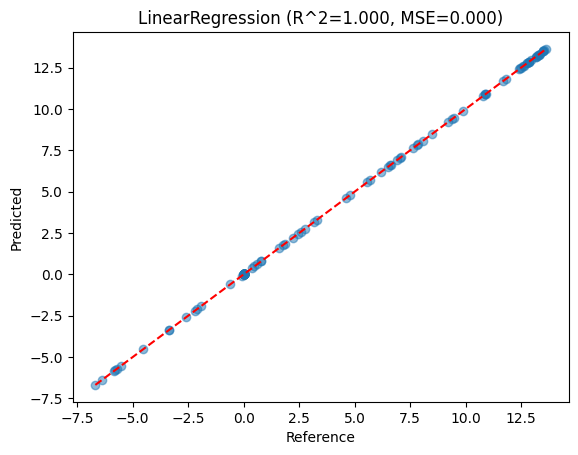

5/5 [==============================] - 0s 2ms/step
Deep Learning Model:
  Training set - R^2: 0.996, MSE: 0.119, MAE: 0.209
  Testing set - R^2: 0.992, MSE: 0.228, MAE: 0.245


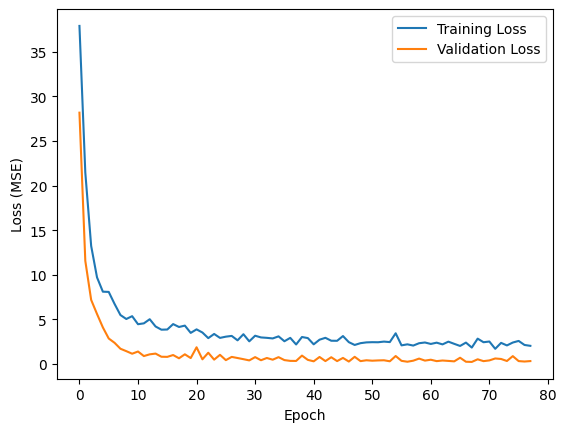

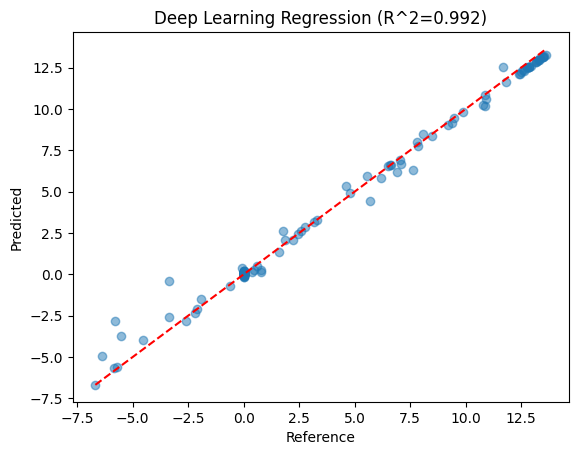

In [ ]:

seed = 42

# Rename column and drop any row with empty cells
#df = df.rename(columns={'mean': 'logh'})

# Select the features that have a correlation with logh greater than 1 or less than -1
selected_features = list(corr_logh[(corr_logh > 0.1) | (corr_logh < -0.1)].index)

# Split the data into training and testing sets
X = df[selected_features]
y = df['logh']

# Check if 'logh' is in selected_features list before removing it
if 'logh' in selected_features:
    selected_features.remove('logh')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

best_model = None
best_r2 = -float("inf")
best_mse = float("inf")

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"{type(model).__name__}:")
    print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
    print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")
    if r2_test > best_r2:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    elif r2_test == best_r2 and mse_test < best_mse:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    print()

# Plot predicted vs reference values for the best model
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'{type(best_model).__name__} (R^2={r2_test:.3f}, MSE={best_mse:.3f})')
plt.show()

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Set early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Deep Learning Model:")
print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

# Plot the loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs reference values for the deep learning model
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'Deep Learning Regression (R^2={r2_test:.3f})')
plt.show()

# Using minmum literature Henry Constant chemical Value to Predict Henry Constant

In [ ]:
df = pd.read_excel('data1.xlsx')

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Remove columns of dtype 'object'
df = df.select_dtypes(exclude='object')
df = df.drop(['median', 'max', 'mean',"max-min"], axis=1)
df.dropna(inplace=True)
df.rename(columns={'min': 'logh'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df.corr()
corr_logh = corr_matrix['logh']
corr_logh_sorted = corr_logh.sort_values(ascending=False)
print(corr_logh_sorted)


logh                                1.000000
logp                                0.235740
bond_polarizability                 0.119250
Hydrogen_number                     0.115192
sp3_count                           0.091622
TopologicalCharge                   0.080227
single_bond                         0.047154
atom_number_with_hydrogen           0.041299
nAtom                               0.041299
triple_bond                         0.020411
sp_count                            0.019682
nRot                                0.014037
atomic_polarizability               0.012785
rel_neg_sasa                       -0.003115
undefined_tetrahedral              -0.014580
carbon_count                       -0.023720
total_radicals                     -0.023882
Basic_group_count                  -0.029731
acidic_group_count                 -0.029731
tetrahedral                        -0.041085
effective_hydrogen_bond_acidity    -0.055659
defined_tetrahedral                -0.061575
Number_Val

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 823
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   logh                              775 non-null    float64
 1   logp                              775 non-null    float64
 2   h_bond_donors                     775 non-null    float64
 3   h_bond_acceptors                  775 non-null    float64
 4   TopologicalCharge                 775 non-null    float64
 5   LogS                              775 non-null    float64
 6   TopoPSA                           775 non-null    float64
 7   atomic_polarizability             775 non-null    float64
 8   bond_polarizability               775 non-null    float64
 9   nAtom                             775 non-null    float64
 10  nHeavyAtom                        775 non-null    float64
 11  nHetero                           775 non-null    float64
 12  nRot    

LinearRegression:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.000

Ridge:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.012
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.014

Lasso:
  Training set - R^2: 0.968, MSE: 1.000, MAE: 0.854
  Testing set - R^2: 0.968, MSE: 0.980, MAE: 0.866

ElasticNet:
  Training set - R^2: 0.861, MSE: 4.411, MAE: 1.719
  Testing set - R^2: 0.857, MSE: 4.393, MAE: 1.750

SVR:
  Training set - R^2: 0.957, MSE: 1.366, MAE: 0.448
  Testing set - R^2: 0.930, MSE: 2.151, MAE: 0.677

DecisionTreeRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 0.998, MSE: 0.060, MAE: 0.082

RandomForestRegressor:
  Training set - R^2: 1.000, MSE: 0.004, MAE: 0.013
  Testing set - R^2: 1.000, MSE: 0.015, MAE: 0.044

GradientBoostingRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.008
  Testing set - R^2: 1.000, MSE: 0.007, MAE: 0.034

AdaBoostRegressor:
  Training set - R^2: 0.998

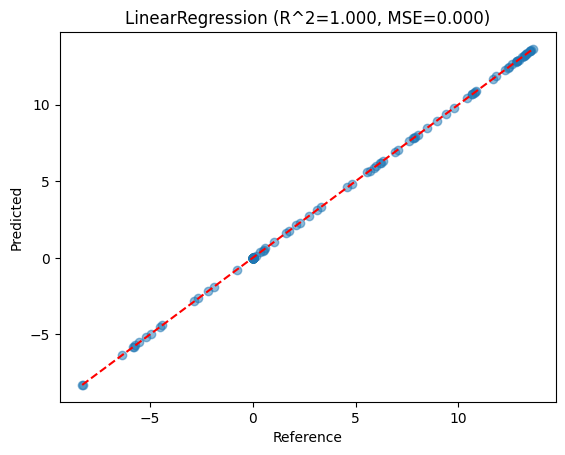

5/5 [==============================] - 0s 4ms/step
Deep Learning Model:
  Training set - R^2: 0.994, MSE: 0.199, MAE: 0.261
  Testing set - R^2: 0.983, MSE: 0.530, MAE: 0.342


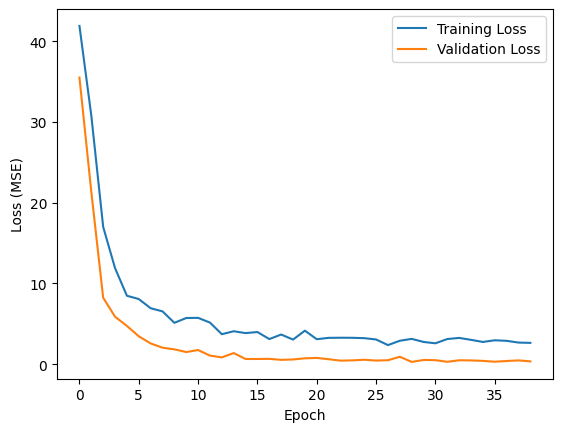

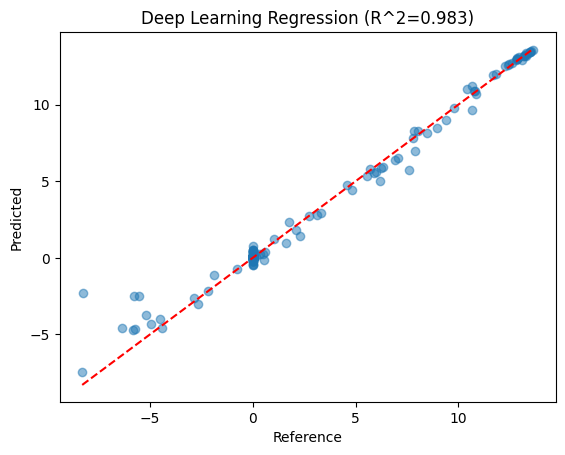

In [ ]:

seed = 42

# Rename column and drop any row with empty cells
#df = df.rename(columns={'mean': 'logh'})

# Select the features that have a correlation with logh greater than 1 or less than -1
selected_features = list(corr_logh[(corr_logh > 0.1) | (corr_logh < -0.1)].index)

# Split the data into training and testing sets
X = df[selected_features]
y = df['logh']

# Check if 'logh' is in selected_features list before removing it
if 'logh' in selected_features:
    selected_features.remove('logh')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

best_model = None
best_r2 = -float("inf")
best_mse = float("inf")

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"{type(model).__name__}:")
    print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
    print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")
    if r2_test > best_r2:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    elif r2_test == best_r2 and mse_test < best_mse:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    print()

# Plot predicted vs reference values for the best model
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'{type(best_model).__name__} (R^2={r2_test:.3f}, MSE={best_mse:.3f})')
plt.show()

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Set early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Deep Learning Model:")
print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

# Plot the loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs reference values for the deep learning model
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'Deep Learning Regression (R^2={r2_test:.3f})')
plt.show()

 # Using maximum literature Henry Constant chemical Value to Predict Henry Constant

In [ ]:
df = pd.read_excel('10.xlsx')

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Remove columns of dtype 'object'
df = df.select_dtypes(exclude='object')
df = df.drop(['max', 'min', 'mean',"max-min"], axis=1)
df.dropna(inplace=True)
df.rename(columns={'median': 'logh'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df.corr()
corr_logh = corr_matrix['logh']
corr_logh_sorted = corr_logh.sort_values(ascending=False)
print(corr_logh_sorted)


logh                                1.000000
logp                                0.226300
bond_polarizability                 0.102100
Hydrogen_number                     0.098003
sp3_count                           0.074509
TopologicalCharge                   0.058442
single_bond                         0.029150
atom_number_with_hydrogen           0.023995
nAtom                               0.023995
triple_bond                         0.019587
sp_count                            0.018334
nRot                                0.008132
atomic_polarizability              -0.004056
rel_neg_sasa                       -0.008172
total_radicals                     -0.016536
undefined_tetrahedral              -0.029252
Basic_group_count                  -0.031257
acidic_group_count                 -0.031257
carbon_count                       -0.038750
tetrahedral                        -0.055989
defined_tetrahedral                -0.064735
double_bond                        -0.069294
effective_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 823
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   logh                              775 non-null    float64
 1   logp                              775 non-null    float64
 2   h_bond_donors                     775 non-null    float64
 3   h_bond_acceptors                  775 non-null    float64
 4   TopologicalCharge                 775 non-null    float64
 5   LogS                              775 non-null    float64
 6   TopoPSA                           775 non-null    float64
 7   atomic_polarizability             775 non-null    float64
 8   bond_polarizability               775 non-null    float64
 9   nAtom                             775 non-null    float64
 10  nHeavyAtom                        775 non-null    float64
 11  nHetero                           775 non-null    float64
 12  nRot    

LinearRegression:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.000

Ridge:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.012
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.014

Lasso:
  Training set - R^2: 0.968, MSE: 1.000, MAE: 0.859
  Testing set - R^2: 0.968, MSE: 0.958, MAE: 0.863

ElasticNet:
  Training set - R^2: 0.861, MSE: 4.376, MAE: 1.725
  Testing set - R^2: 0.858, MSE: 4.228, MAE: 1.730

SVR:
  Training set - R^2: 0.959, MSE: 1.294, MAE: 0.435
  Testing set - R^2: 0.942, MSE: 1.739, MAE: 0.590

DecisionTreeRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 0.999, MSE: 0.029, MAE: 0.062

RandomForestRegressor:
  Training set - R^2: 1.000, MSE: 0.002, MAE: 0.011
  Testing set - R^2: 1.000, MSE: 0.014, MAE: 0.048

GradientBoostingRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.008
  Testing set - R^2: 1.000, MSE: 0.005, MAE: 0.033

AdaBoostRegressor:
  Training set - R^2: 0.998

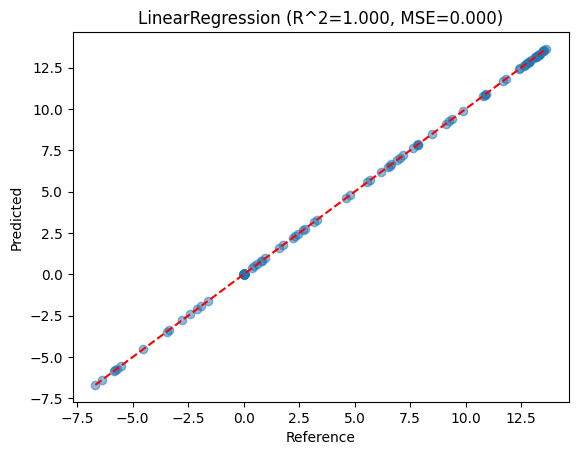

5/5 [==============================] - 0s 3ms/step
Deep Learning Model:
  Training set - R^2: 0.991, MSE: 0.288, MAE: 0.287
  Testing set - R^2: 0.983, MSE: 0.495, MAE: 0.346


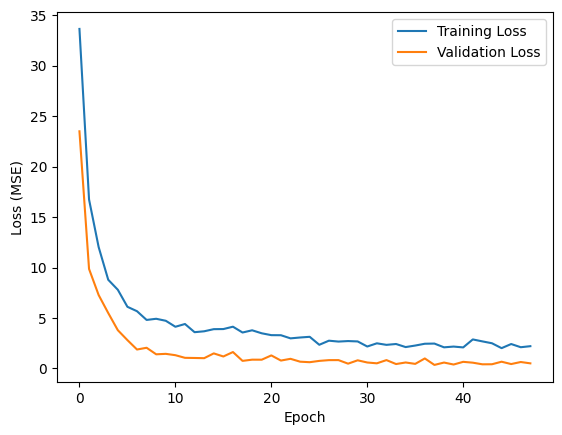

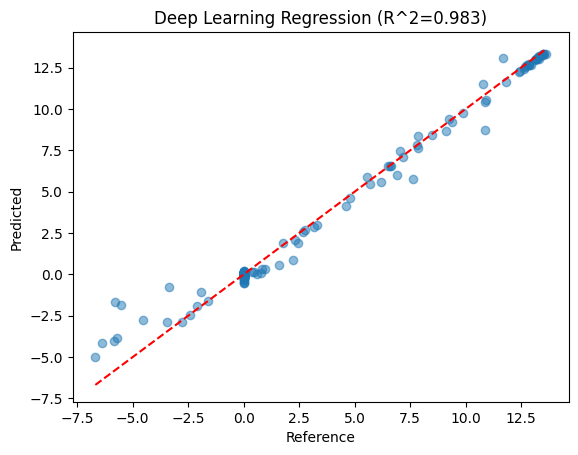

In [ ]:

seed = 42

# Rename column and drop any row with empty cells
#df = df.rename(columns={'mean': 'logh'})

# Select the features that have a correlation with logh greater than 1 or less than -1
selected_features = list(corr_logh[(corr_logh > 0.1) | (corr_logh < -0.1)].index)

# Split the data into training and testing sets
X = df[selected_features]
y = df['logh']

# Check if 'logh' is in selected_features list before removing it
if 'logh' in selected_features:
    selected_features.remove('logh')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

best_model = None
best_r2 = -float("inf")
best_mse = float("inf")

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"{type(model).__name__}:")
    print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
    print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")
    if r2_test > best_r2:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    elif r2_test == best_r2 and mse_test < best_mse:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    print()

# Plot predicted vs reference values for the best model
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'{type(best_model).__name__} (R^2={r2_test:.3f}, MSE={best_mse:.3f})')
plt.show()

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Set early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Deep Learning Model:")
print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

# Plot the loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs reference values for the deep learning model
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'Deep Learning Regression (R^2={r2_test:.3f})')
plt.show()

 # Using maximum literature Henry Constant chemical Value to Predict Henry Constant

In [ ]:
df = pd.read_excel('data1.xlsx')

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Remove columns of dtype 'object'
df = df.select_dtypes(exclude='object')
df = df.drop(['median', 'min', 'mean',"max-min"], axis=1)
df.dropna(inplace=True)
df.rename(columns={'max': 'logh'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df.corr()
corr_logh = corr_matrix['logh']
corr_logh_sorted = corr_logh.sort_values(ascending=False)
print(corr_logh_sorted)


logh                                1.000000
logp                                0.213091
bond_polarizability                 0.078432
Hydrogen_number                     0.074474
sp3_count                           0.046962
TopologicalCharge                   0.038175
triple_bond                         0.016095
sp_count                            0.014289
atom_number_with_hydrogen           0.003335
nAtom                               0.003335
single_bond                         0.001053
nRot                               -0.005675
total_radicals                     -0.009322
atomic_polarizability              -0.022307
rel_neg_sasa                       -0.028952
acidic_group_count                 -0.032901
Basic_group_count                  -0.032901
undefined_tetrahedral              -0.047457
carbon_count                       -0.050960
double_bond                        -0.064643
defined_tetrahedral                -0.068140
tetrahedral                        -0.074250
LogS      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 823
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   logh                              775 non-null    float64
 1   logp                              775 non-null    float64
 2   h_bond_donors                     775 non-null    float64
 3   h_bond_acceptors                  775 non-null    float64
 4   TopologicalCharge                 775 non-null    float64
 5   LogS                              775 non-null    float64
 6   TopoPSA                           775 non-null    float64
 7   atomic_polarizability             775 non-null    float64
 8   bond_polarizability               775 non-null    float64
 9   nAtom                             775 non-null    float64
 10  nHeavyAtom                        775 non-null    float64
 11  nHetero                           775 non-null    float64
 12  nRot    

LinearRegression:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.000

Ridge:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.012
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.014

Lasso:
  Training set - R^2: 0.968, MSE: 1.000, MAE: 0.867
  Testing set - R^2: 0.968, MSE: 0.932, MAE: 0.854

ElasticNet:
  Training set - R^2: 0.860, MSE: 4.431, MAE: 1.752
  Testing set - R^2: 0.857, MSE: 4.189, MAE: 1.723

SVR:
  Training set - R^2: 0.955, MSE: 1.438, MAE: 0.469
  Testing set - R^2: 0.945, MSE: 1.604, MAE: 0.562

DecisionTreeRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.009, MAE: 0.042

RandomForestRegressor:
  Training set - R^2: 1.000, MSE: 0.002, MAE: 0.012
  Testing set - R^2: 1.000, MSE: 0.011, MAE: 0.038

GradientBoostingRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.008
  Testing set - R^2: 1.000, MSE: 0.002, MAE: 0.023

AdaBoostRegressor:
  Training set - R^2: 0.997

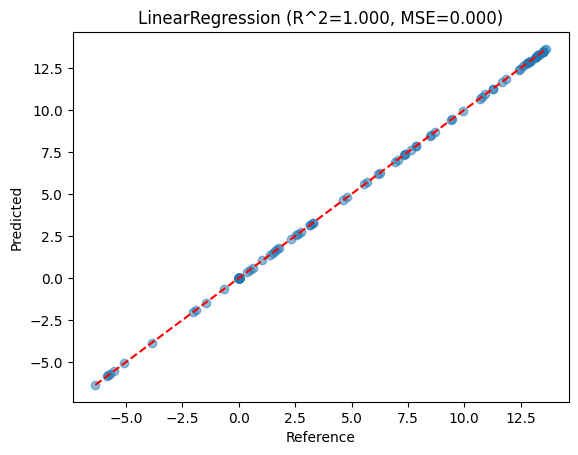

5/5 [==============================] - 0s 3ms/step
Deep Learning Model:
  Training set - R^2: 0.993, MSE: 0.207, MAE: 0.275
  Testing set - R^2: 0.990, MSE: 0.306, MAE: 0.316


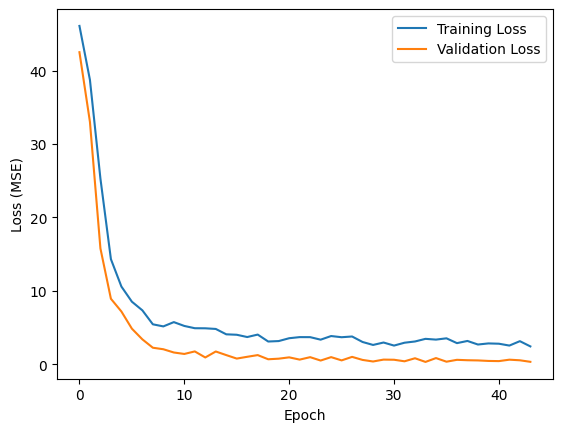

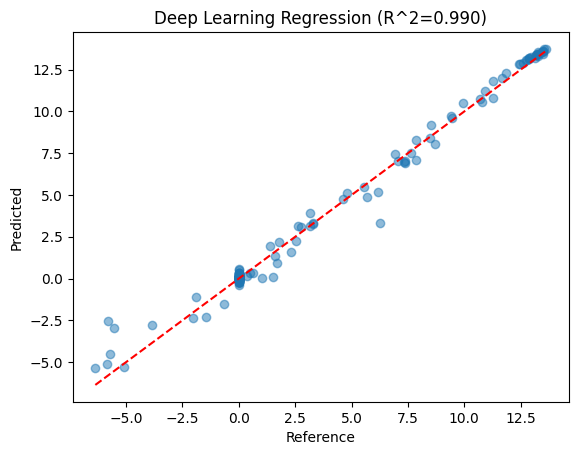

In [ ]:

seed = 42

# Rename column and drop any row with empty cells
#df = df.rename(columns={'mean': 'logh'})

# Select the features that have a correlation with logh greater than 1 or less than -1
selected_features = list(corr_logh[(corr_logh > 0.1) | (corr_logh < -0.1)].index)

# Split the data into training and testing sets
X = df[selected_features]
y = df['logh']

# Check if 'logh' is in selected_features list before removing it
if 'logh' in selected_features:
    selected_features.remove('logh')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

best_model = None
best_r2 = -float("inf")
best_mse = float("inf")

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"{type(model).__name__}:")
    print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
    print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")
    if r2_test > best_r2:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    elif r2_test == best_r2 and mse_test < best_mse:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    print()

# Plot predicted vs reference values for the best model
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'{type(best_model).__name__} (R^2={r2_test:.3f}, MSE={best_mse:.3f})')
plt.show()

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Set early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Deep Learning Model:")
print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

# Plot the loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs reference values for the deep learning model
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'Deep Learning Regression (R^2={r2_test:.3f})')
plt.show()

# Predict Partition Cofficient 

In [ ]:
df = pd.read_excel('data1.xlsx')

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Remove columns of dtype 'object'
df = df.select_dtypes(exclude='object')
df = df.drop(['median', 'min', 'max',"max-min"], axis=1)
df.dropna(inplace=True)
df.rename(columns={'mean': 'logh'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df.corr()
corr_logh = corr_matrix['logp']
corr_logh_sorted = corr_logh.sort_values(ascending=False)
print(corr_logh_sorted)


logp                                1.000000
atomic_polarizability               0.885714
carbon_count                        0.873313
atom_number_with_hydrogen           0.865498
nAtom                               0.865498
bond_polarizability                 0.844959
effective_hydrogen_bond_acidity     0.843811
Hydrogen_number                     0.841042
Number_Valence_Electrons            0.824397
exact_molwt                         0.802258
nHeavyAtom                          0.797092
WPath                               0.724587
nRot                                0.716572
single_bond                         0.681611
Zagreb1                             0.675466
sp3_count                           0.650460
WPol                                0.560407
rel_neg_sasa                        0.233970
logh                                0.227189
nAromBond                           0.206988
nAromAtom                           0.205782
weight_path_count                   0.193185
num_rings 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 823
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   logh                              775 non-null    float64
 1   logp                              775 non-null    float64
 2   h_bond_donors                     775 non-null    float64
 3   h_bond_acceptors                  775 non-null    float64
 4   TopologicalCharge                 775 non-null    float64
 5   LogS                              775 non-null    float64
 6   TopoPSA                           775 non-null    float64
 7   atomic_polarizability             775 non-null    float64
 8   bond_polarizability               775 non-null    float64
 9   nAtom                             775 non-null    float64
 10  nHeavyAtom                        775 non-null    float64
 11  nHetero                           775 non-null    float64
 12  nRot    

LinearRegression:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.000

Ridge:
  Training set - R^2: 1.000, MSE: 0.001, MAE: 0.016
  Testing set - R^2: 1.000, MSE: 0.001, MAE: 0.018

Lasso:
  Training set - R^2: 0.831, MSE: 1.000, MAE: 0.712
  Testing set - R^2: 0.830, MSE: 1.758, MAE: 0.800

ElasticNet:
  Training set - R^2: 0.876, MSE: 0.737, MAE: 0.639
  Testing set - R^2: 0.884, MSE: 1.205, MAE: 0.708

SVR:
  Training set - R^2: 0.909, MSE: 0.538, MAE: 0.219
  Testing set - R^2: 0.487, MSE: 5.307, MAE: 0.584

DecisionTreeRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 0.988, MSE: 0.125, MAE: 0.063

RandomForestRegressor:
  Training set - R^2: 1.000, MSE: 0.002, MAE: 0.010
  Testing set - R^2: 0.983, MSE: 0.177, MAE: 0.084

GradientBoostingRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.006
  Testing set - R^2: 0.987, MSE: 0.130, MAE: 0.067

AdaBoostRegressor:
  Training set - R^2: 0.993

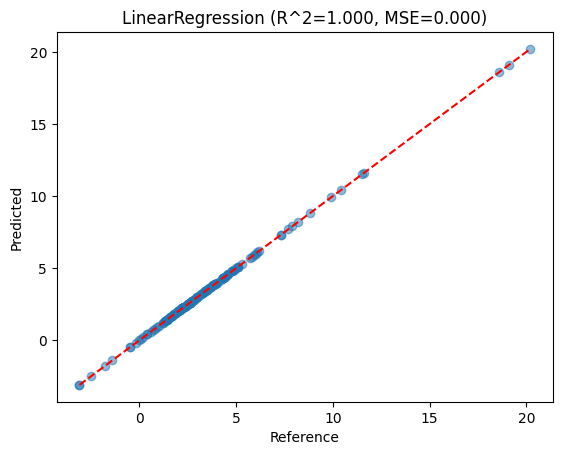

5/5 [==============================] - 0s 3ms/step
Deep Learning Model:
  Training set - R^2: 0.974, MSE: 0.155, MAE: 0.290
  Testing set - R^2: 0.976, MSE: 0.253, MAE: 0.368


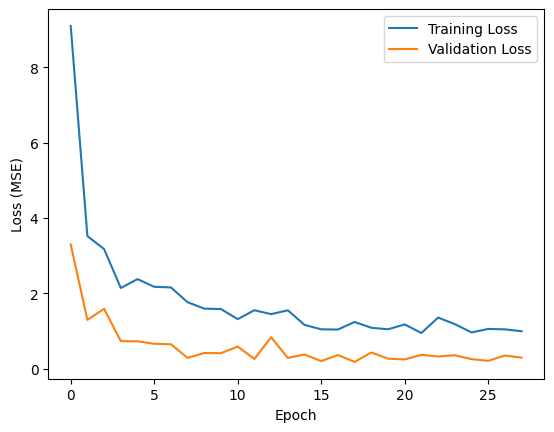

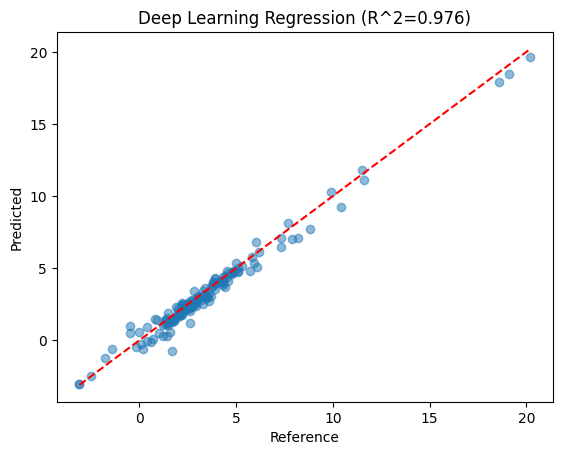

In [ ]:

seed = 42

# Rename column and drop any row with empty cells
#df = df.rename(columns={'mean': 'logh'})

# Select the features that have a correlation with logh greater than 1 or less than -1
selected_features = list(corr_logh[(corr_logh > 0.1) | (corr_logh < -0.1)].index)

# Split the data into training and testing sets
X = df[selected_features]
y = df['logp']

# Check if 'logh' is in selected_features list before removing it
if 'logp' in selected_features:
    selected_features.remove('logp')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

best_model = None
best_r2 = -float("inf")
best_mse = float("inf")

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"{type(model).__name__}:")
    print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
    print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")
    if r2_test > best_r2:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    elif r2_test == best_r2 and mse_test < best_mse:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    print()

# Plot predicted vs reference values for the best model
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'{type(best_model).__name__} (R^2={r2_test:.3f}, MSE={best_mse:.3f})')
plt.show()

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Set early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Deep Learning Model:")
print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

# Plot the loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs reference values for the deep learning model
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'Deep Learning Regression (R^2={r2_test:.3f})')
plt.show()

# Predict logarithm of solubility

In [ ]:
df = pd.read_excel('data1.xlsx')

# Identify columns with dtype 'object'
object_columns = df.select_dtypes(include='object').columns

# Remove columns of dtype 'object'
df = df.select_dtypes(exclude='object')
df = df.drop(['median', 'min', 'max',"max-min"], axis=1)
df.dropna(inplace=True)
df.rename(columns={'mean': 'logh'}, inplace=True)

# Calculate correlation matrix
corr_matrix = df.corr()
corr_logh = corr_matrix['LogS']
corr_logh_sorted = corr_logh.sort_values(ascending=False)
print(corr_logh_sorted)


LogS                                1.000000
wpsa                                0.503159
nHetero                             0.494722
TopoPSA                             0.488388
tpsa                                0.488119
surface_tension                     0.488119
h_bond_acceptors                    0.484552
h_bond_donors                       0.391613
effective_hydrogen_bond_basicity    0.339544
double_bond                         0.219581
polarizability                      0.207678
tetrahedral                         0.161615
sp_count                            0.147940
total_radicals                      0.138605
triple_bond                         0.122293
defined_tetrahedral                 0.121062
undefined_tetrahedral               0.116630
acidic_group_count                  0.068036
Basic_group_count                   0.068036
logh                               -0.092045
TopologicalCharge                  -0.109982
quale_parachor                     -0.157087
rel_neg_sa

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 823
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   logh                              775 non-null    float64
 1   logp                              775 non-null    float64
 2   h_bond_donors                     775 non-null    float64
 3   h_bond_acceptors                  775 non-null    float64
 4   TopologicalCharge                 775 non-null    float64
 5   LogS                              775 non-null    float64
 6   TopoPSA                           775 non-null    float64
 7   atomic_polarizability             775 non-null    float64
 8   bond_polarizability               775 non-null    float64
 9   nAtom                             775 non-null    float64
 10  nHeavyAtom                        775 non-null    float64
 11  nHetero                           775 non-null    float64
 12  nRot    

LinearRegression:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 1.000, MSE: 0.000, MAE: 0.000

Ridge:
  Training set - R^2: 1.000, MSE: 0.001, MAE: 0.018
  Testing set - R^2: 1.000, MSE: 0.001, MAE: 0.019

Lasso:
  Training set - R^2: 0.734, MSE: 1.000, MAE: 0.689
  Testing set - R^2: 0.733, MSE: 1.654, MAE: 0.774

ElasticNet:
  Training set - R^2: 0.845, MSE: 0.583, MAE: 0.521
  Testing set - R^2: 0.860, MSE: 0.867, MAE: 0.585

SVR:
  Training set - R^2: 0.933, MSE: 0.253, MAE: 0.167
  Testing set - R^2: 0.518, MSE: 2.981, MAE: 0.436

DecisionTreeRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.000
  Testing set - R^2: 0.990, MSE: 0.065, MAE: 0.056

RandomForestRegressor:
  Training set - R^2: 1.000, MSE: 0.001, MAE: 0.009
  Testing set - R^2: 0.986, MSE: 0.087, MAE: 0.058

GradientBoostingRegressor:
  Training set - R^2: 1.000, MSE: 0.000, MAE: 0.008
  Testing set - R^2: 0.989, MSE: 0.066, MAE: 0.060

AdaBoostRegressor:
  Training set - R^2: 0.992

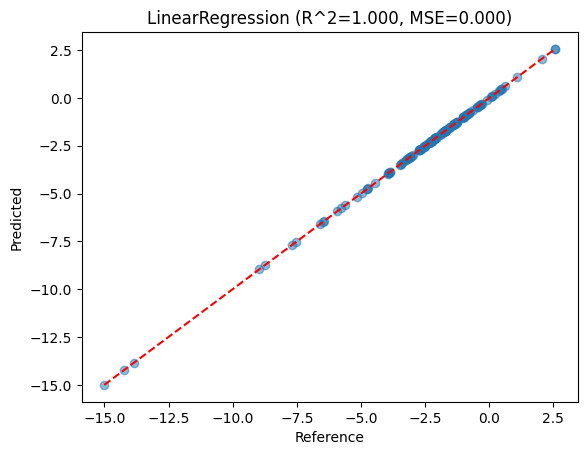

5/5 [==============================] - 0s 2ms/step
Deep Learning Model:
  Training set - R^2: 0.976, MSE: 0.091, MAE: 0.240
  Testing set - R^2: 0.981, MSE: 0.117, MAE: 0.252


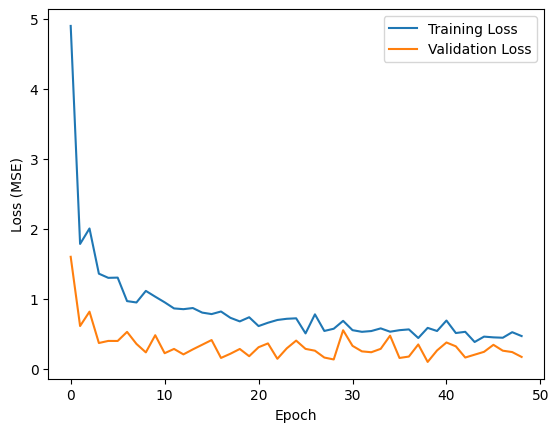

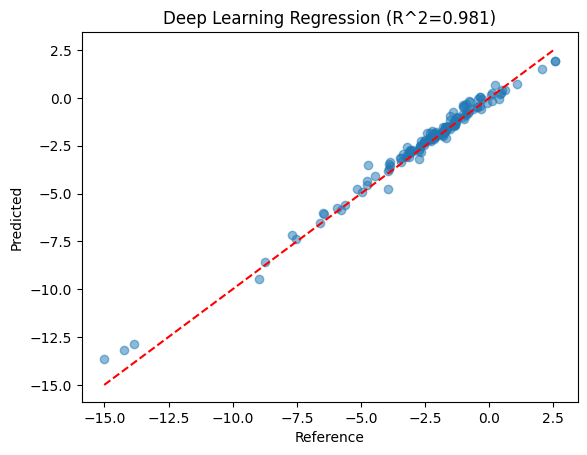

In [ ]:

seed = 42

# Rename column and drop any row with empty cells
#df = df.rename(columns={'mean': 'logh'})

# Select the features that have a correlation with logh greater than 1 or less than -1
selected_features = list(corr_logh[(corr_logh > 0.1) | (corr_logh < -0.1)].index)

# Split the data into training and testing sets
X = df[selected_features]
y = df['LogS']

# Check if 'logh' is in selected_features list before removing it
if 'LogS' in selected_features:
    selected_features.remove('LogS')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(),
]

best_model = None
best_r2 = -float("inf")
best_mse = float("inf")

for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    print(f"{type(model).__name__}:")
    print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
    print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")
    if r2_test > best_r2:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    elif r2_test == best_r2 and mse_test < best_mse:
        best_model = model
        best_r2 = r2_test
        best_mse = mse_test
    print()

# Plot predicted vs reference values for the best model
y_pred_test = best_model.predict(X_test_scaled)
r2_test = r2_score(y_test, y_pred_test)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'{type(best_model).__name__} (R^2={r2_test:.3f}, MSE={best_mse:.3f})')
plt.show()

# Build the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=optimizer)

# Set early stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

# Evaluate the model
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Deep Learning Model:")
print(f"  Training set - R^2: {r2_train:.3f}, MSE: {mse_train:.3f}, MAE: {mae_train:.3f}")
print(f"  Testing set - R^2: {r2_test:.3f}, MSE: {mse_test:.3f}, MAE: {mae_test:.3f}")

# Plot the loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Plot predicted vs reference values for the deep learning model
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Reference')
plt.ylabel('Predicted')
plt.title(f'Deep Learning Regression (R^2={r2_test:.3f})')
plt.show()